## Analysis of UAL Earnings Call - Q1 2025

In [ ]:
# Data source: https://seekingalpha.com/article/4775660-united-airlines-holdings-inc-ual-q1-2025-earnings-call-transcript?_gl=1*o8o77t*_up*MQ..*_gs*MQ..&gclid=Cj0KCQjw9O_BBhCUARIsAHQMjS5srMIMi77dN7JFgQ4v_WZENQLPnhetvF_eQN1yMsWNlOk0VHCohD0aAj__EALw_wcB&gbraid=0AAAAACup1PxT55zZLqvsapOp_4kOeLky_
# Can explore more in the Seeking Alpha website. 
# e.g., interesting patterns to see when financial fraud news came out: https://seekingalpha.com/symbol/LKNCY  --- https://en.wikipedia.org/wiki/Accounting_scandals -- Luckin Coffee	2020	Ernst & Young	 China	Inflated its 2019 sales revenue by up to US$310 million

In [ ]:
# how to parse docx: https://chatgpt.com/share/683de2f3-8ee0-8010-b411-be96c825c99d

In [1]:
# 1. Install dependencies
!pip install -q pydub praat-parselmouth ffmpeg-python

# 2. Upload MP3
from google.colab import files
uploaded = files.upload()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.0 MB/s eta 0:00:00


Saving ual_united_airlines_holdings_inc_ual_bernstein_41st_annual_strategic_decisions_conference_transcript.mp3 to ual_united_airlines_holdings_inc_ual_bernstein_41st_annual_strategic_decisions_conference_transcript.mp3


In [2]:
import os
import ffmpeg

In [3]:

# 3. Convert MP3 to WAV
input_file = list(uploaded.keys())[0]
output_wav = input_file.replace('.mp3', '.wav')
os.system(f"ffmpeg -i '{input_file}' '{output_wav}'")

0

In [4]:
# 4. Extract pitch using Parselmouth (Praat)
import parselmouth
import numpy as np
import matplotlib.pyplot as plt

snd = parselmouth.Sound(output_wav)
pitch = snd.to_pitch()

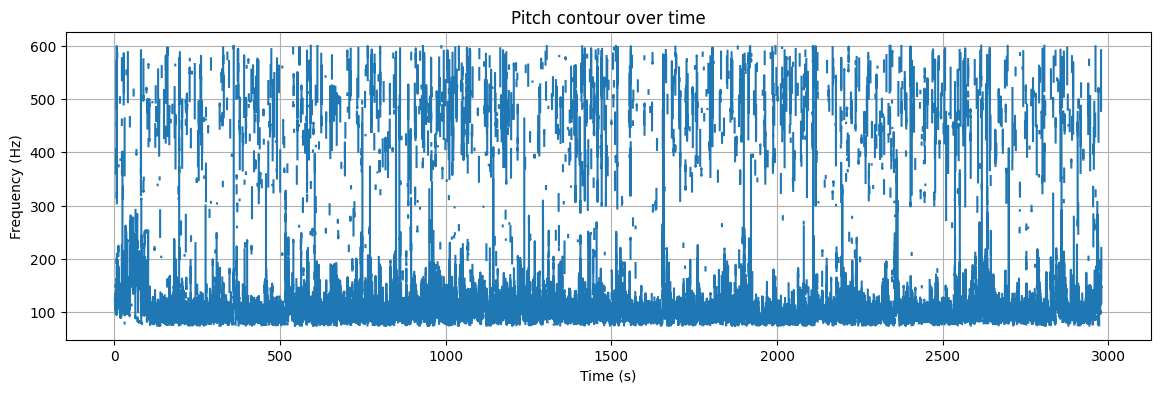

In [5]:
# 5. Plot pitch contour
pitch_values = pitch.selected_array['frequency']
pitch_values[pitch_values == 0] = np.nan  # Replace unvoiced parts with NaN
time = pitch.xs()



plt.figure(figsize=(14, 4))
plt.plot(time, pitch_values, label="Pitch (Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Pitch contour over time")
plt.grid(True)
plt.show()

In [6]:
# 6. Summary statistics
mean_pitch = np.nanmean(pitch_values)
min_pitch = np.nanmin(pitch_values)
max_pitch = np.nanmax(pitch_values)
print(f"📊 Mean pitch: {mean_pitch:.2f} Hz")
print(f"📉 Min pitch: {min_pitch:.2f} Hz")
print(f"📈 Max pitch: {max_pitch:.2f} Hz")


📊 Mean pitch: 121.48 Hz
📉 Min pitch: 74.88 Hz
📈 Max pitch: 599.87 Hz


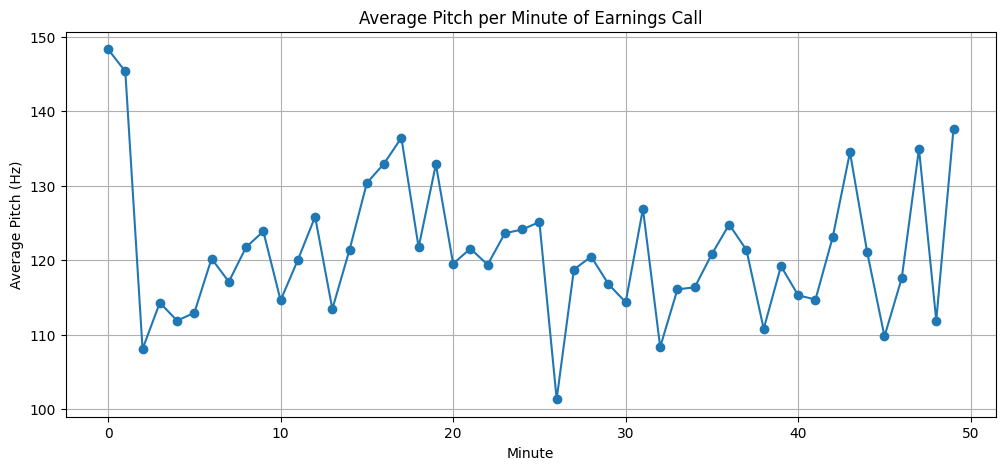

In [8]:
import pandas as pd

# Create DataFrame of pitch data
pitch_df = pd.DataFrame({
    'time': time,
    'pitch': pitch_values
})

# Remove NaN (unvoiced segments)
pitch_df = pitch_df.dropna()

# Convert time to minute bins
pitch_df['minute'] = (pitch_df['time'] // 60).astype(int)

# Group by minute and compute average pitch
avg_pitch_per_min = pitch_df.groupby('minute')['pitch'].mean().reset_index()

# Plot average pitch per minute
plt.figure(figsize=(12, 5))
plt.plot(avg_pitch_per_min['minute'], avg_pitch_per_min['pitch'], marker='o')
plt.xlabel("Minute")
plt.ylabel("Average Pitch (Hz)")
plt.title("Average Pitch per Minute of Earnings Call")
plt.grid(True)
plt.show()

In [ ]:
# if you want to check the proceeded stock price data
import yfinance as yf

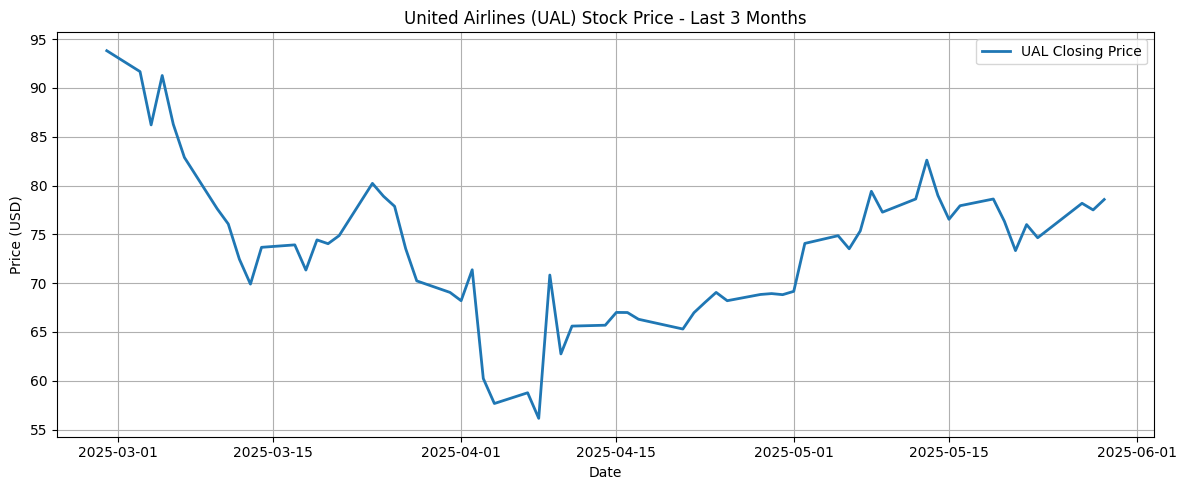

In [11]:
# Fetch United Airlines (UAL) stock data
ual = yf.Ticker("UAL")
hist = ual.history(period="3mo")  # You can change to "6mo", "1y", etc.

# Plot the closing price
plt.figure(figsize=(12, 5))
plt.plot(hist.index, hist['Close'], label='UAL Closing Price', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("United Airlines (UAL) Stock Price - Last 3 Months")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()